In [6]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import numpy as np

In [3]:
# Loading Training Data
X_train = np.load("C:/Users/paddy/Python/Deep Learning/eyes_data_train.npy")
Y_train = np.load("C:/Users/paddy/Python/Deep Learning/eyes_labels_train.npy")

# Loading Testing Data
X_test = np.load("C:/Users/paddy/Python/Deep Learning/eyes_data_test.npy")
Y_test = np.load("C:/Users/paddy/Python/Deep Learning/eyes_labels_test.npy")


# Creating Model
model = Sequential()
# Conv2D layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
# Max Pool
model.add(MaxPool2D(pool_size=(3,3)))
# Conv2D layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# Max Pool
model.add(MaxPool2D(pool_size=(3,3)))
# Conv2D layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
# Max Pool
model.add(MaxPool2D(pool_size=(3,3)))
# Flatten Layer
model.add(Flatten())
# Dense Layers
model.add(Dense(units=64,activation='elu'))
# Dense Layers
model.add(Dense(units=32,activation='elu'))
# Dense Layers
model.add(Dense(units=1,activation='sigmoid'))


model.compile('adam','binary_crossentropy',['accuracy'])

model.fit(X_train,Y_train,batch_size=32,epochs=3,validation_split=0.2)

model.save("D:\DATA SCIENCE\Projects\DrowsinessDetection\Models\eye_status_model2")

Epoch 1/3
1557/1557 [==============================] - 360s 231ms/step - loss: 0.2547 - accuracy: 0.9045 - val_loss: 0.1490 - val_accuracy: 0.9436
Epoch 2/3
1557/1557 [==============================] - 348s 224ms/step - loss: 0.1309 - accuracy: 0.9534 - val_loss: 0.1004 - val_accuracy: 0.9646
Epoch 3/3
1557/1557 [==============================] - 349s 224ms/step - loss: 0.1121 - accuracy: 0.9600 - val_loss: 0.0886 - val_accuracy: 0.9692
INFO:tensorflow:Assets written to: Models/eye_status_model2\assets


#### LOAD MODEL

In [9]:
model2 = load_model("D:\DATA SCIENCE\Projects\DrowsinessDetection\Models\eye_status_model2")

In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)        

#### METRICS ON TEST

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
Y_pred = model.predict(X_test)

In [13]:
X_test.shape

(12368, 100, 100)

In [25]:
Y_pred_coded = []

for pred in Y_pred:
    if pred>=0.75:
        Y_pred_coded.append(1)
    else:
        Y_pred_coded.append(0)

In [26]:
print(classification_report(Y_test,Y_pred_coded))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5003
           1       0.96      0.97      0.97      7365

    accuracy                           0.96     12368
   macro avg       0.96      0.96      0.96     12368
weighted avg       0.96      0.96      0.96     12368



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

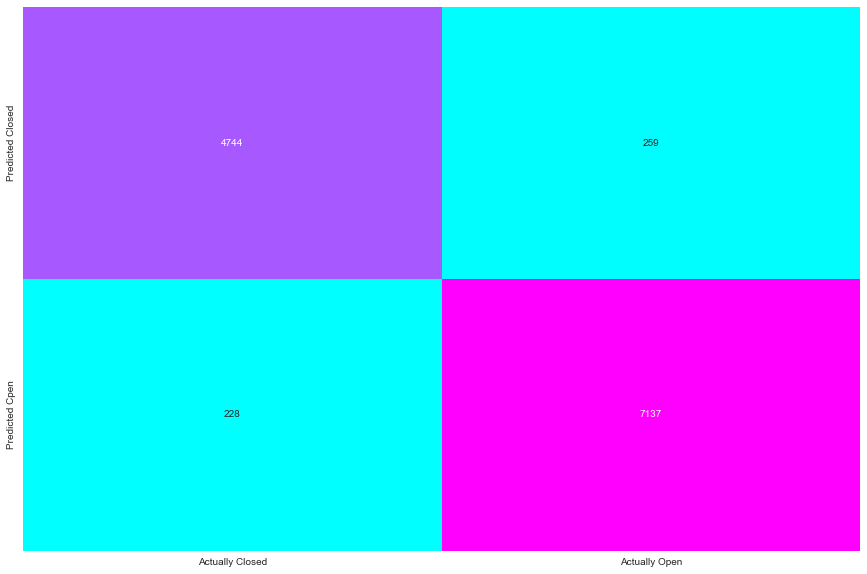

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(Y_test,Y_pred_coded),annot=True,fmt='d',cbar=False,cmap='cool')
ax.set_xticklabels(['Actually Closed','Actually Open'])
ax.set_yticklabels(['Predicted Closed','Predicted Cpen'])

plt.show()